In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# data loaded

df = pd.read_csv("/Users/Admin/Documents/Python Scripts/hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
# overall look at the data

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Checking for null values

count=df.isnull().sum()
count

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Sanity checks
# Checking if registered + casual = cnt for all the records

print('Count: ',np.sum(df['registered'] + df['casual'] != df['cnt']))

Count:  0


In [6]:
# checking month values is 1-12

print('Month value: ',np.unique(df['mnth']).tolist())

Month value:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [7]:
# checking hr values is 0-23

print('Hour value: ',np.unique(df['hr']).tolist())

Hour value:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [8]:
# from the given data we can see that instant is an index column so we drop it

df.drop(['instant'],axis=1,inplace=True)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered

df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [10]:
# we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [11]:
# creating a new dataframe

inp1=df.copy()
inp1

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [12]:
# Describing the numerical fields in the dataset using pandas describe method.

inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:ylabel='Density'>

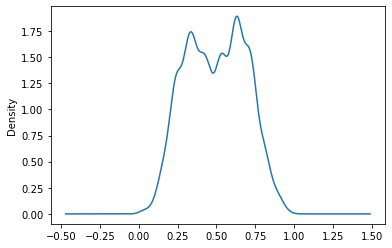

In [13]:
# density plot for temp

inp1.temp.plot.density()

<AxesSubplot:>

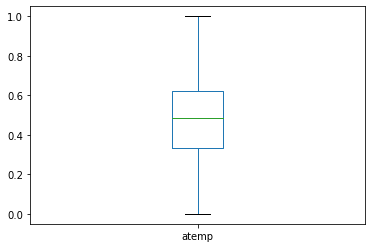

In [14]:
# Boxplot for atemp ,to check outliers

inp1.atemp.plot.box()

<AxesSubplot:ylabel='Frequency'>

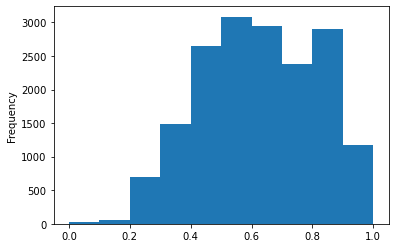

In [15]:
# histogram to detect abnormally high values 

inp1.hum.plot.hist()

<AxesSubplot:ylabel='Density'>

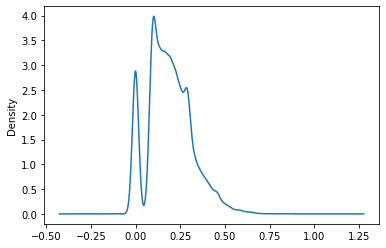

In [16]:
# Density plot for windspeed

inp1.windspeed.plot.kde()

<AxesSubplot:>

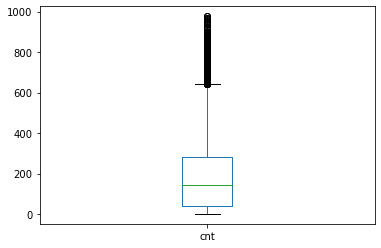

In [17]:
# boxplot for cnt columns, found outliers present

inp1.cnt.plot.box()

<AxesSubplot:ylabel='Density'>

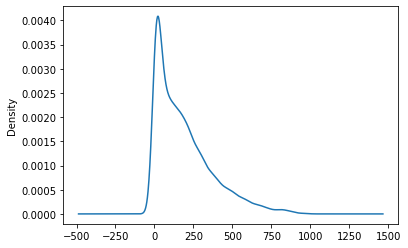

In [18]:
# density for cnt column

inp1.cnt.plot.density()

<AxesSubplot:xlabel='hr', ylabel='cnt'>

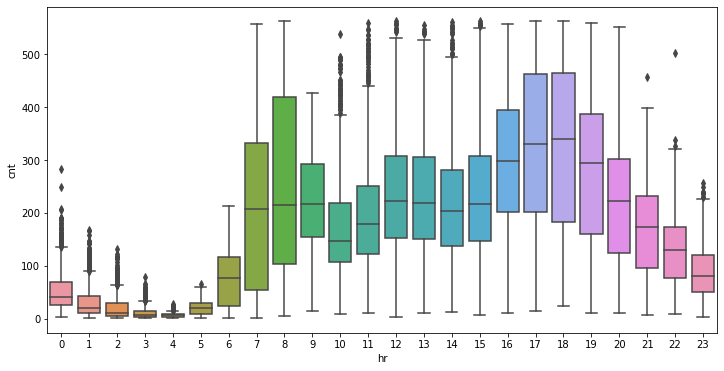

In [19]:
# Finding the following percentiles - 10, 25, 50, 75, 90, 95, 99
# Deciding the cutoff percentile and drop records with values higher that the cutoff, named the new dataframe ‘inp2’.

inp1.cnt.quantile([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
inp2 = inp1[inp1.cnt < 563].copy()
inp2.cnt.describe()
plt.figure(figsize=[12,6])
sns.boxplot(x='hr',y='cnt',data=inp2)

#It’s evident that the peak hours are 5PM – 7PM, the hours 7-8AM also have high upper quartile. 
#A hypothesis could be that a lot of people use the bikes for commute to workplace and back.

<AxesSubplot:xlabel='hr', ylabel='cnt'>

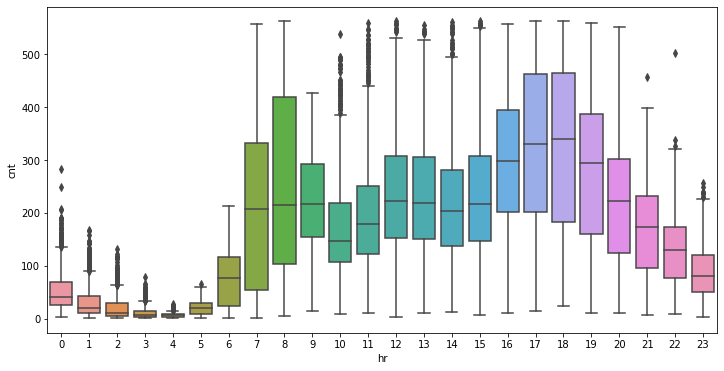

In [20]:
# Making boxplot for  cnt vs hour

plt.figure(figsize=[12,6])
sns.boxplot('hr','cnt',data=inp2)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

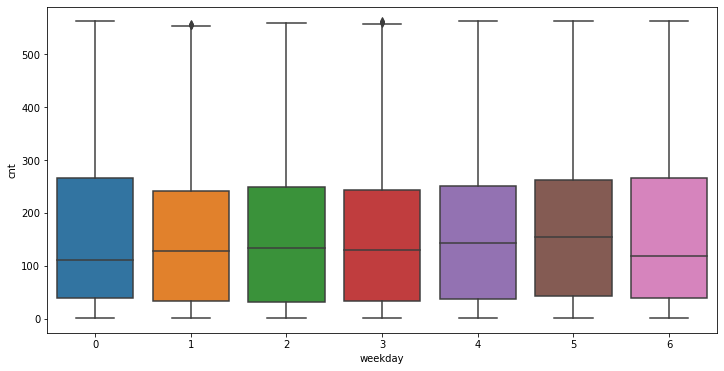

In [21]:
# Making boxplot for  cnt vs weekday

plt.figure(figsize=[12,6])
sns.boxplot('weekday','cnt',data=inp2)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

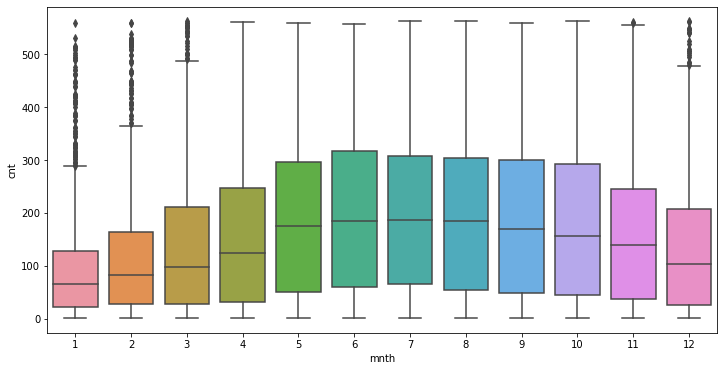

In [22]:
# Making boxplot for  cnt vs mnnth

plt.figure(figsize=[12,6])
sns.boxplot('mnth','cnt',data=inp2)

# Looks like end of winter/ early spring months have the least bike riding instances.

<AxesSubplot:xlabel='season', ylabel='cnt'>

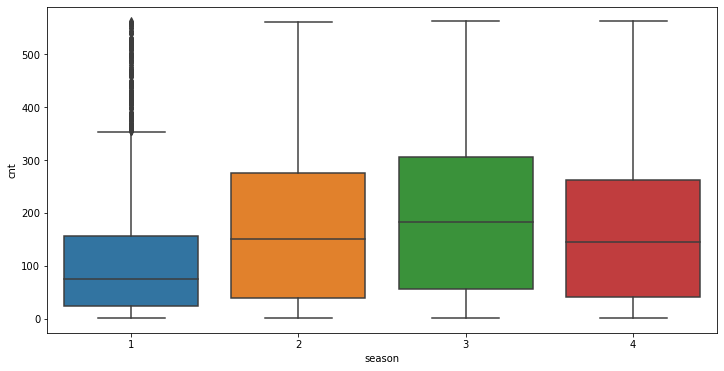

In [23]:
# Making boxplot for  cnt vs season

plt.figure(figsize=[12,6])
sns.boxplot('season','cnt',data=inp2)


<AxesSubplot:xlabel='hr'>

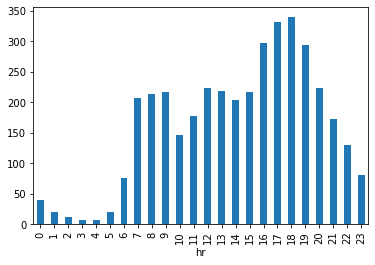

In [24]:
#Making a bar plot with the median value of cnt for each hr

res = inp2.groupby('hr').median()
res.cnt.plot.bar()

<AxesSubplot:>

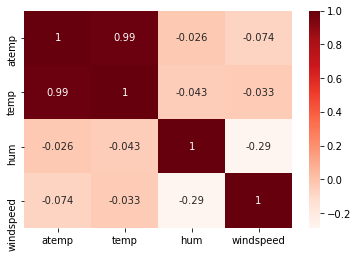

In [25]:
# Making a correlation matrix for variables atemp, temp, hum, and windspeed

corr = inp2[['atemp','temp','hum','windspeed']].corr()
sns.heatmap(corr, annot=True, cmap="Reds")

In [26]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16502 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      16502 non-null  int64  
 1   yr          16502 non-null  int64  
 2   mnth        16502 non-null  int64  
 3   hr          16502 non-null  int64  
 4   holiday     16502 non-null  int64  
 5   weekday     16502 non-null  int64  
 6   workingday  16502 non-null  int64  
 7   weathersit  16502 non-null  int64  
 8   temp        16502 non-null  float64
 9   atemp       16502 non-null  float64
 10  hum         16502 non-null  float64
 11  windspeed   16502 non-null  float64
 12  cnt         16502 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 2.4 MB


In [27]:
# Treating mnth column
# For values 5,6,7,8,9,10, replacing with a single value 5.
# Getting dummies for the updated 6 mnth values

inp3 = inp2.copy()
inp3.mnth[inp3.mnth.isin([5,6,7,8,9])] = 5
np.unique(inp3.mnth)

array([ 1,  2,  3,  4,  5, 10, 11, 12], dtype=int64)

In [28]:
# Treating hr column
# Create new mapping: 0-5: 0, 11-15: 11; other values are untouched.

inp3.hr[inp3.hr.isin([0,1,2,3,4,5])] = 0
inp3.hr[inp3.hr.isin([11,12,13,14,15])] = 11

In [29]:
# Getting dummy columns for season, weathersit, weekday, mnth, and hr. 

cat_cols = ['season', 'weathersit', 'weekday', 'mnth', 'hr']
inp3 = pd.get_dummies(inp3, columns=cat_cols, drop_first=True)
inp3

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.24,0.2879,0.81,0.0000,16,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0000,40,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0000,32,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0000,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.2576,0.60,0.1642,119,0,0,...,0,0,0,0,0,1,0,0,0,0
17375,1,0,1,0.26,0.2576,0.60,0.1642,89,0,0,...,0,0,0,0,0,0,1,0,0,0
17376,1,0,1,0.26,0.2576,0.60,0.1642,90,0,0,...,0,0,0,0,0,0,0,1,0,0
17377,1,0,1,0.26,0.2727,0.56,0.1343,61,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# Train test split: Applying 70-30 split.
# Model building
# Using linear regression as the technique
# Reporting the R2 on the train set
# Making predictions on test set and report R2.

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)
y_train = df_train.pop("cnt")
X_train = df_train

y_test = df_test.pop("cnt")
X_test = df_test
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Reporting r2 for the model 

from sklearn.metrics import r2_score
y_train_pred= lr.predict(X_train)
r2_score(y_train, y_train_pred)

y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred)

0.6644579963857071